In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Load prepared data
prepared_data = pd.read_csv('data/processed/prepared_data.csv')

In [37]:
# Descriptive statistics
print(prepared_data.describe())

              FG3A         FG3M     FG3_PCT      FG_PCT           W  \
count   270.000000   270.000000  270.000000  270.000000  270.000000   
mean   2402.418519   859.292593   35.708519   46.020000   39.811111   
std     457.429214   174.519477    1.654879    1.580471   11.910348   
min    1223.000000   406.000000   31.700000   40.800000   10.000000   
25%    2111.500000   738.500000   34.600000   45.000000   32.000000   
50%    2413.000000   867.000000   35.550000   46.100000   41.000000   
75%    2679.750000   979.750000   36.875000   47.100000   48.000000   
max    3721.000000  1363.000000   41.600000   50.400000   73.000000   

               FGA          FGM          FTA          FTM          REB  \
count   270.000000   270.000000   270.000000   270.000000   270.000000   
mean   6918.292593  3183.962963  1808.681481  1390.040741  3504.440741   
std     404.218066   220.332375   199.235720   151.917613   241.979419   
min    5586.000000  2425.000000  1258.000000   983.000000  2721.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


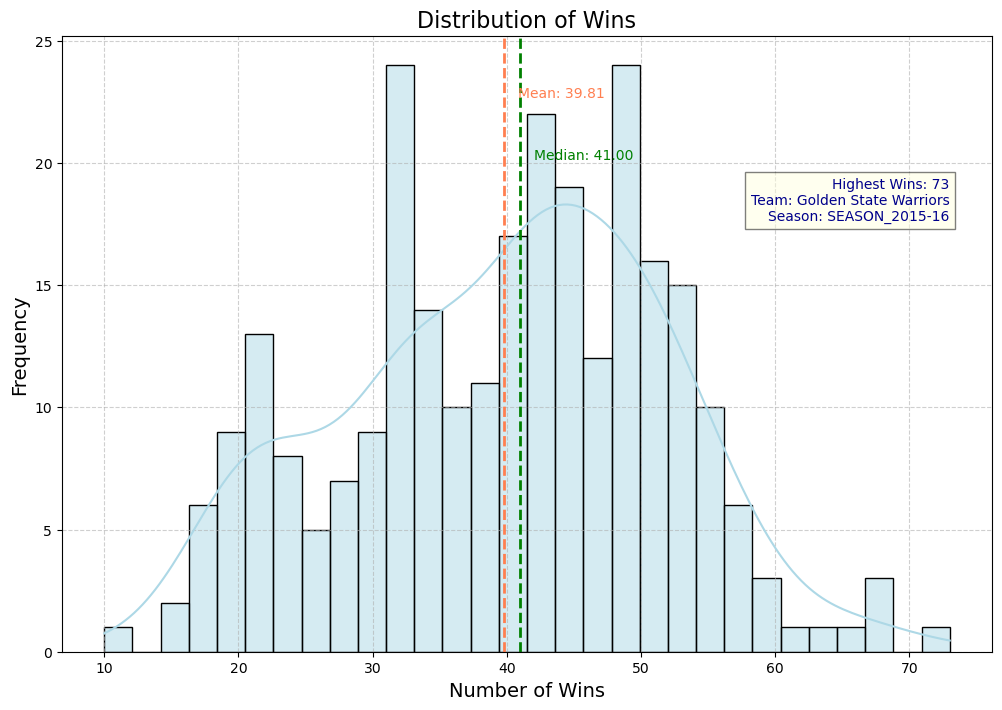

In [67]:
# Find the row with the maximum number of wins
max_wins = prepared_data['W'].max()
max_wins_row = prepared_data.loc[prepared_data['W'] == max_wins]

# Find the corresponding team and season for the maximum wins
team_max_wins = max_wins_row[team_columns].idxmax(axis=1).values[0]
season_max_wins = max_wins_row.filter(like='SEASON').idxmax(axis=1).values[0]

# Distribution of wins with improved visualization
plt.figure(figsize=(12, 8))
sns.set_palette('pastel')
sns.histplot(prepared_data['W'], bins=30, kde=True, color='lightblue', edgecolor='black')

# Adding mean and median lines
mean_wins = prepared_data['W'].mean()
median_wins = prepared_data['W'].median()
plt.axvline(mean_wins, color='coral', linestyle='dashed', linewidth=2)
plt.axvline(median_wins, color='green', linestyle='dashed', linewidth=2)

# Adding annotations for mean and median
plt.text(mean_wins + 1, max(plt.gca().get_ylim()) * 0.9, f'Mean: {mean_wins:.2f}', color='coral')
plt.text(median_wins + 1, max(plt.gca().get_ylim()) * 0.8, f'Median: {median_wins:.2f}', color='green')

# Adding annotation for the team with the highest wins
plt.text(max_wins, max(plt.gca().get_ylim()) * 0.7, f'Highest Wins: {max_wins}\nTeam: {team_max_wins}\nSeason: {season_max_wins}', 
         color='darkblue', ha='right', bbox=dict(facecolor='lightyellow', alpha=0.5))

# Title and labels
plt.title('Distribution of Wins', fontsize=16)
plt.xlabel('Number of Wins', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save and show the plot
plt.savefig('visualizations/distribution_of_wins.png')
plt.show()


The distribution is approximately symmetric but slightly skewed to the right. There is a higher concentration of teams around the median (41 wins) and mean (39.81 wins).


The mean (39.81) and median (41.00) are close to each other, indicating a relatively normal distribution but with a slight right skew. Most teams tend to win between 30 to 50 games.


The Golden State Warriors' 73 wins in the SEASON_2015-16 are significantly higher than the rest of the teams, which is clearly highlighted in the annotation box.


The histogram peaks around 40-45 wins, showing that this range is the most common among teams.


Team Performance: Most NBA teams win between 30 and 50 games, with fewer teams achieving very high or very low win totals.

Exceptional Performance: The 73-win season by the Golden State Warriors in SEASON_2015-16 is an outlier and highlights an exceptional performance far above the average.

Symmetry and Skewness: The near symmetry with a slight right skew suggests that while most teams hover around the central tendency, some teams have a significantly higher number of wins.

/Applications/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Applications/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Applications/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Applications/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[

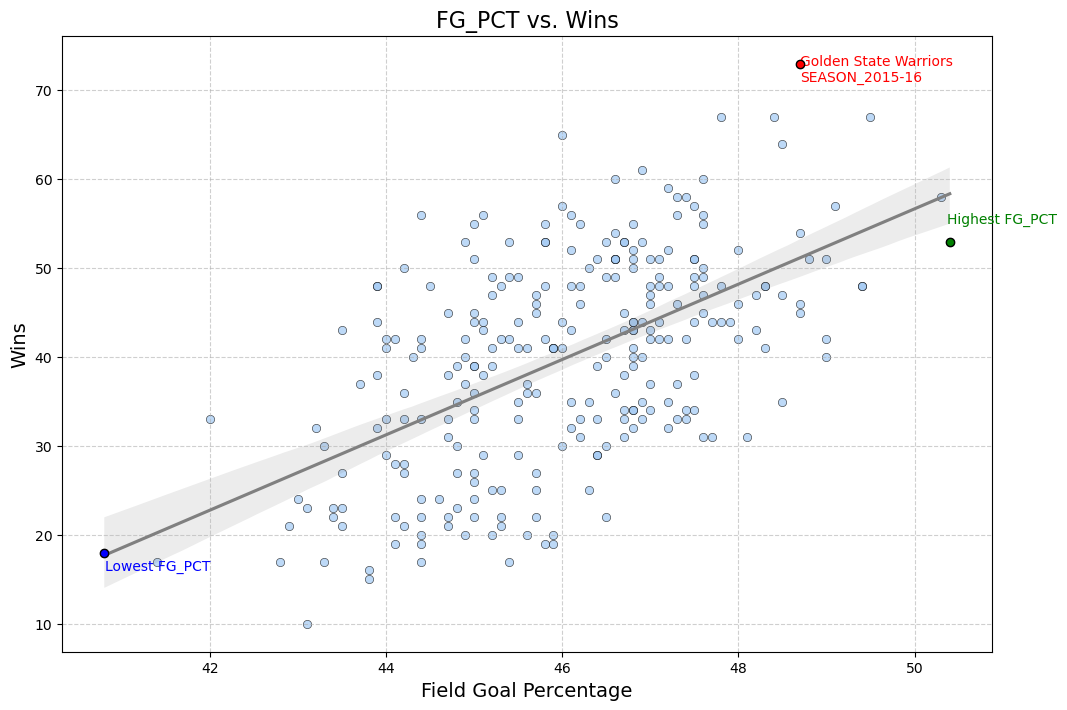

In [69]:
# Find the row with the maximum number of wins
max_wins = prepared_data['W'].max()
max_wins_row = prepared_data.loc[prepared_data['W'] == max_wins]

# Find the corresponding team and season for the maximum wins
team_max_wins = max_wins_row[team_columns].idxmax(axis=1).values[0]
season_max_wins = max_wins_row.filter(like='SEASON').idxmax(axis=1).values[0]

# Find the row with the highest FG_PCT
max_fg_pct = prepared_data['FG_PCT'].max()
max_fg_pct_row = prepared_data.loc[prepared_data['FG_PCT'] == max_fg_pct]

# Find the row with the lowest FG_PCT
min_fg_pct = prepared_data['FG_PCT'].min()
min_fg_pct_row = prepared_data.loc[prepared_data['FG_PCT'] == min_fg_pct]

# Relationship between FG_PCT and Wins with improved visualization
plt.figure(figsize=(12, 8))
sns.set_palette('pastel')
sns.scatterplot(x='FG_PCT', y='W', data=prepared_data, edgecolor='black', alpha=0.7)

# Adding regression line
sns.regplot(x='FG_PCT', y='W', data=prepared_data, scatter=False, color='gray')

# Highlight the point with the maximum wins
plt.scatter(max_wins_row['FG_PCT'], max_wins_row['W'], color='red', edgecolor='black', zorder=5)
plt.text(max_wins_row['FG_PCT'] + 0.005, max_wins_row['W'] - 2, f'{team_max_wins}\n{season_max_wins}', color='red')

# Annotate the highest FG_PCT
plt.scatter(max_fg_pct_row['FG_PCT'], max_fg_pct_row['W'], color='green', edgecolor='black', zorder=5)
plt.text(max_fg_pct_row['FG_PCT'] - 0.03, max_fg_pct_row['W'] + 2, 'Highest FG_PCT', color='green')

# Annotate the lowest FG_PCT
plt.scatter(min_fg_pct_row['FG_PCT'], min_fg_pct_row['W'], color='blue', edgecolor='black', zorder=5)
plt.text(min_fg_pct_row['FG_PCT'] + 0.005, min_fg_pct_row['W'] - 2, 'Lowest FG_PCT', color='blue')

# Title and labels
plt.title('FG_PCT vs. Wins', fontsize=16)
plt.xlabel('Field Goal Percentage', fontsize=14)
plt.ylabel('Wins', fontsize=14)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save and show the plot
plt.savefig('visualizations/fg_pct_vs_wins.png')
plt.show()


The regression line shows a positive slope, indicating that higher field goal percentages are generally associated with a higher number of wins. This suggests that teams that shoot more accurately tend to win more games.

Data points are spread out but show a clustering trend along the regression line. Most teams have a field goal percentage between 42% and 48% and wins ranging from 20 to 60.

Golden State Warriors: Marked as an outlier with an exceptionally high number of wins (73) and a high field goal percentage. This point is far above the general cluster, highlighting their exceptional performance in the SEASON_2015-16.

Highest FG_PCT: A team with the highest FG_PCT (around 50%) has a notable number of wins (around 50), indicating high shooting accuracy correlates with better performance.

Lowest FG_PCT: A team with the lowest FG_PCT (around 41%) has fewer wins (around 20), suggesting that poor shooting accuracy correlates with fewer wins.

Shooting Accuracy and Success: The positive correlation emphasizes the importance of shooting accuracy (FG_PCT) in achieving success (wins) in the NBA.

Outlier Performance: The Golden State Warriors’ performance in SEASON_2015-16 is an exceptional case where both high FG_PCT and a high number of wins are evident, far surpassing other teams.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


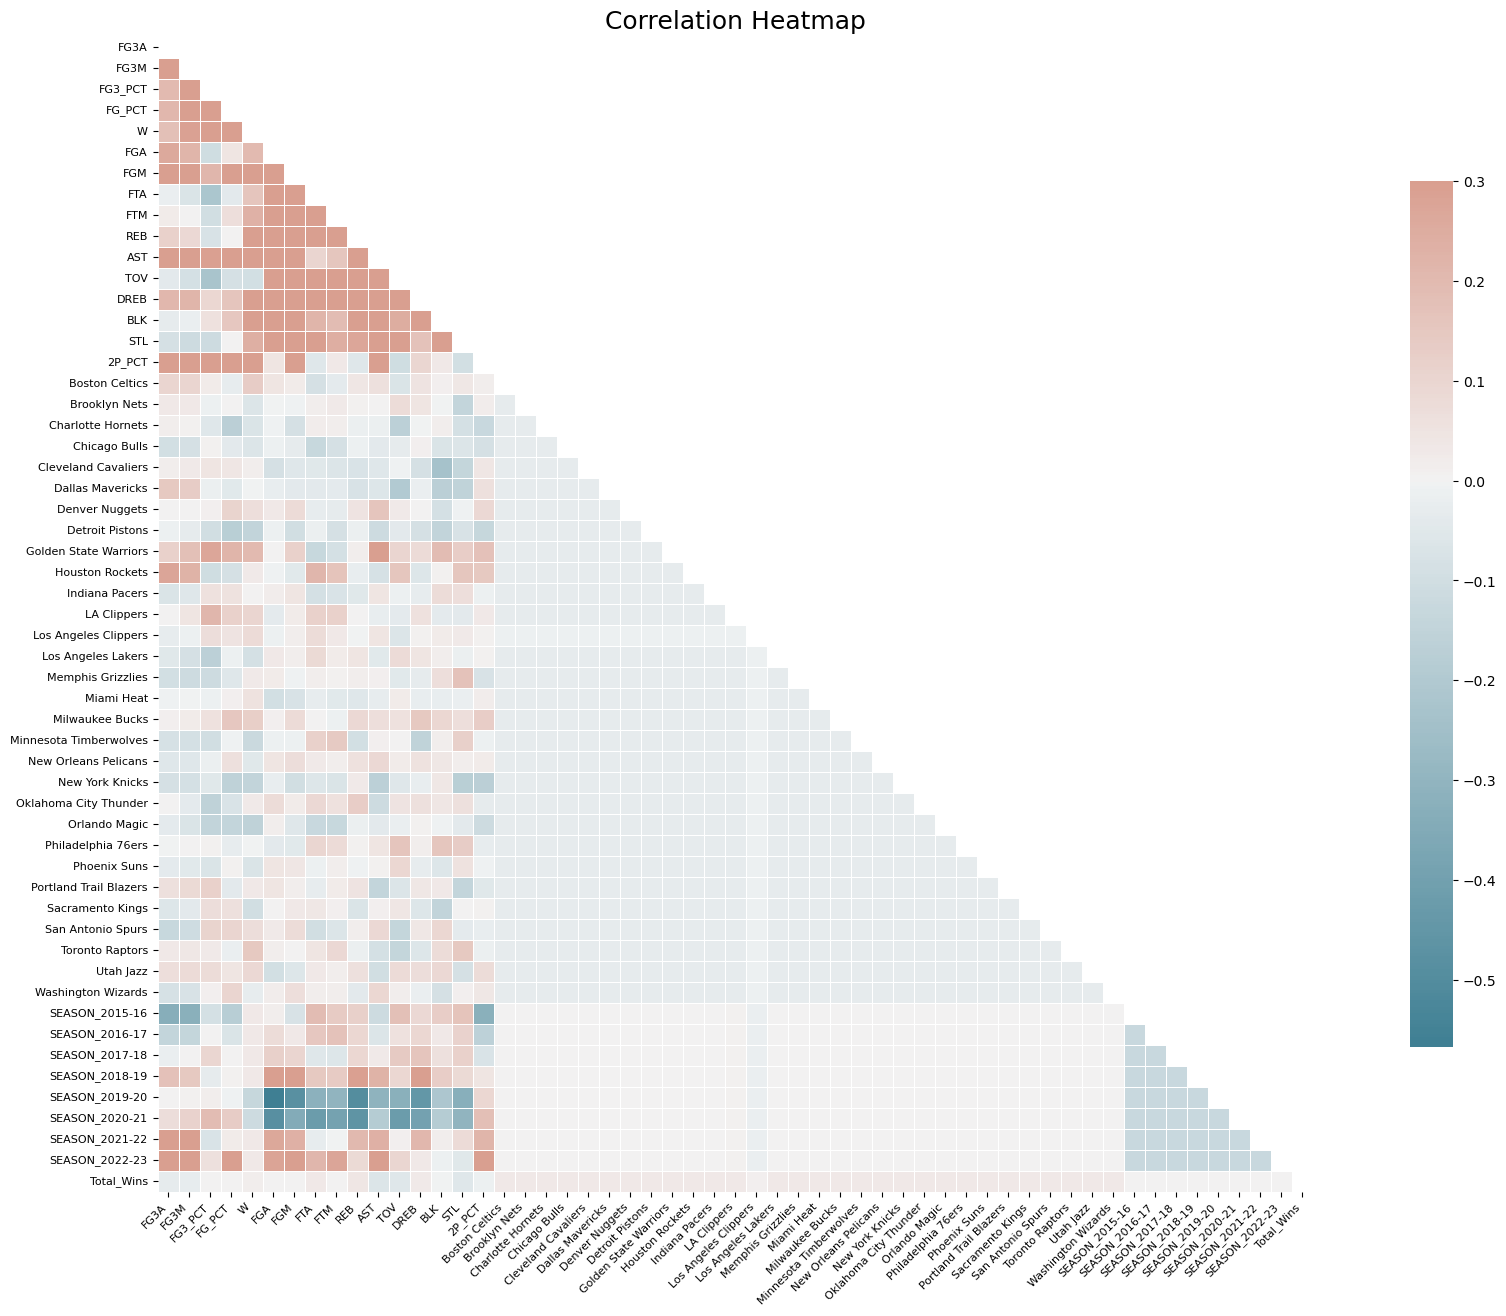

In [77]:
# Calculate the correlation matrix
corr_matrix = prepared_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', 
            cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Add title and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Save and show the plot
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()


FGM (Field Goals Made) and FGA (Field Goals Attempted): As expected, there is a high positive correlation between the number of field goals made and attempted.

REB (Rebounds) and DREB (Defensive Rebounds): There's a strong positive correlation, which is logical because total rebounds include defensive rebounds.

W (Wins) and FG_PCT (Field Goal Percentage): Wins are positively correlated with field goal percentage, indicating that teams with higher shooting accuracy tend to win more games.


TOV (Turnovers) and W (Wins): There's a noticeable negative correlation between turnovers and wins, suggesting that higher turnovers tend to result in fewer wins.

Certain Teams and Seasons: Some teams show negative correlations with specific seasons, which might indicate weaker performance or fewer wins in those seasons.



FG_PCT and W: Positive correlation implies teams with better shooting accuracy win more.
REB and BLK: Positive correlation suggests teams that rebound well also block more shots.

TOV and FG_PCT: Negative correlation indicates teams with higher shooting accuracy tend to commit fewer turnovers.
Personal Fouls (PF) and FG_PCT: Negative correlation might indicate that teams with better shooting discipline commit fewer fouls.

Boston Celtics: Moderate positive correlation with some seasons, suggesting consistent performance.

Golden State Warriors: Correlation patterns reflect their performance peaks and troughs across seasons.

Seasonal Performance: SEASON_2018-19, for example, might show strong correlations with top-performing teams of that year.